In [1]:
import numpy as np
import sys
import scipy.stats
import re

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../codes')

In [4]:
%pprint

Pretty printing has been turned OFF


In [5]:
from VMSfunctions.Common import *
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *

# Mass Spec test

In [6]:
import pickle
hmdb = pickle.load(open('../models/hmdb_compounds.p','rb'))

In [7]:
ps = load_obj('../models/peak_sampler_4_beers.p')
xcms_output = '../models/beer_ms1_peaks.csv.gz'
chromatograms = ChromatogramCreator(xcms_output)

DEBUG:Chromatograms:Loading 0 chromatograms
../codes\VMSfunctions\Common.py:56: RuntimeWarning:

divide by zero encountered in double_scalars

DEBUG:Chromatograms:Loading 5000 chromatograms
DEBUG:Chromatograms:Loading 10000 chromatograms
DEBUG:Chromatograms:Loading 15000 chromatograms
DEBUG:Chromatograms:Loading 20000 chromatograms
DEBUG:Chromatograms:Loading 25000 chromatograms
DEBUG:Chromatograms:Loading 30000 chromatograms
DEBUG:Chromatograms:Loading 35000 chromatograms
DEBUG:Chromatograms:Loading 40000 chromatograms
DEBUG:Chromatograms:Loading 45000 chromatograms


In [8]:
chemicals = ChemicalCreator(ps, chromatograms)

# Improve Chemical Creator

Generate a dataset of 1000 chemicals

In [15]:
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
dataset = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 1000, 2, "Known","Empirical", None, False, hmdb)

DEBUG:Chemicals:1000 ms1 peaks to be created.
DEBUG:Chemicals:i = 25 Total = 37
DEBUG:Chemicals:i = 25 Total = 38
DEBUG:Chemicals:i = 50 Total = 67
DEBUG:Chemicals:i = 75 Total = 101
DEBUG:Chemicals:i = 75 Total = 102
DEBUG:Chemicals:i = 100 Total = 127
DEBUG:Chemicals:i = 125 Total = 157
DEBUG:Chemicals:i = 150 Total = 187
DEBUG:Chemicals:i = 150 Total = 188
DEBUG:Chemicals:i = 175 Total = 219
DEBUG:Chemicals:i = 200 Total = 254
DEBUG:Chemicals:i = 225 Total = 292
DEBUG:Chemicals:i = 225 Total = 293
DEBUG:Chemicals:i = 225 Total = 294
DEBUG:Chemicals:i = 225 Total = 295
DEBUG:Chemicals:i = 250 Total = 322
DEBUG:Chemicals:i = 275 Total = 352
DEBUG:Chemicals:i = 300 Total = 385
DEBUG:Chemicals:i = 300 Total = 386
DEBUG:Chemicals:i = 325 Total = 417
DEBUG:Chemicals:i = 350 Total = 447
DEBUG:Chemicals:i = 375 Total = 478
DEBUG:Chemicals:i = 400 Total = 511
DEBUG:Chemicals:i = 400 Total = 512
DEBUG:Chemicals:i = 425 Total = 547
DEBUG:Chemicals:i = 450 Total = 580
DEBUG:Chemicals:i = 475 To

In [16]:
len(dataset)

1000

Pick one chemical that has a long chromatogram

In [26]:
for i in range(len(dataset)):
    chem = dataset[i]
    chrom = chem.chromatogram
    if len(chrom.rts) > 40:
        print(chrom.rts)
        break

[0.0, 1.252999999999929, 2.4890000000000327, 3.7250000000000227, 4.960000000000036, 6.199000000000069, 7.471000000000004, 8.70900000000006, 9.947999999999979, 11.187000000000012, 12.426000000000045, 13.666000000000054, 14.904999999999973, 16.144999999999982, 17.42100000000005, 18.661000000000058, 19.899999999999977, 21.13900000000001, 22.37799999999993, 23.617999999999938, 24.859000000000037, 26.097999999999956, 27.375999999999976, 28.615999999999985, 29.855999999999995, 31.105999999999995, 32.347000000000094, 33.587999999999965, 34.829000000000065, 36.072000000000116, 37.34999999999991, 38.59100000000001, 39.83200000000011, 41.11099999999999, 42.53499999999997, 43.778999999999996, 45.02200000000005, 46.26700000000005, 47.50999999999999, 48.752000000000066, 49.99599999999998, 51.274, 52.694999999999936, 53.93799999999999, 55.17900000000009, 56.42100000000005]


In [27]:
chem

KnownChemical - 'C35H62O3' rt=613.33 max_intensity=5642871.10

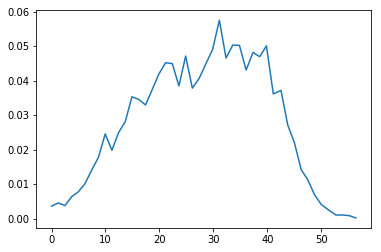

In [28]:
plt.plot(chrom.rts, chrom.intensities)

# Test Top N Controller

Runs only this chemical through the mass spec

In [29]:
dataset = [chem]

In [33]:
max_rt = 20*60                  # the maximum retention time of scans to generate
N = 1                           # top-N DDA fragmentation
mz_tol = 5                      # the mz isolation window around a selected precursor ion
rt_tol = 15                     # the rt window around a selected precursor ion to prevent it from fragmented multiple times
min_ms2_intensity = 5000        # the minimum ms2 peak intensity

mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms2_intensity=min_ms2_intensity)
controller.run(max_rt)

INFO:TopNController:Acquisition open
INFO:TopNController:Received Scan 4731 num_peaks=6 rt=613.49 ms_level=1
DEBUG:TopNController:Isolated precursor ion 529.4628 window (529.4601, 529.4654)
DEBUG:TopNController:Dynamic exclusion from_mz 529.4601 to_mz 529.4654 from_rt 598.49 to_rt 628.49
INFO:TopNController:Received Scan 4732 num_peaks=10 rt=613.57 ms_level=2
INFO:TopNController:Received Scan 4733 num_peaks=6 rt=613.72 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4628 rt 613.72
INFO:TopNController:Received Scan 4734 num_peaks=6 rt=614.04 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4628 rt 614.04
INFO:TopNController:Received Scan 4735 num_peaks=6 rt=614.18 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4628 rt 614.18
INFO:TopNController:Received Scan 4736 num_peaks=6 rt=614.25 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4628 rt 614.25
INFO:TopNController:Received Scan 4737 num_peaks=6 rt=614.36 ms_level=1
DEBUG:TopNCont

INFO:TopNController:Received Scan 4790 num_peaks=6 rt=621.19 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4626 rt 621.19
INFO:TopNController:Received Scan 4791 num_peaks=6 rt=621.37 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4626 rt 621.37
INFO:TopNController:Received Scan 4792 num_peaks=6 rt=621.46 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4626 rt 621.46
INFO:TopNController:Received Scan 4793 num_peaks=6 rt=621.60 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4627 rt 621.60
INFO:TopNController:Received Scan 4794 num_peaks=6 rt=621.67 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4627 rt 621.67
INFO:TopNController:Received Scan 4795 num_peaks=6 rt=621.83 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4627 rt 621.83
INFO:TopNController:Received Scan 4796 num_peaks=6 rt=621.91 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4628 rt 621.91
INFO:TopNController:Received Scan 

DEBUG:TopNController:Excluded precursor ion mz 529.4627 rt 629.34
INFO:TopNController:Received Scan 4850 num_peaks=6 rt=629.41 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4627 rt 629.41
INFO:TopNController:Received Scan 4851 num_peaks=6 rt=629.56 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4627 rt 629.56
INFO:TopNController:Received Scan 4852 num_peaks=6 rt=629.68 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4627 rt 629.68
INFO:TopNController:Received Scan 4853 num_peaks=6 rt=629.86 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4627 rt 629.86
INFO:TopNController:Received Scan 4854 num_peaks=6 rt=629.99 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4627 rt 629.99
INFO:TopNController:Received Scan 4855 num_peaks=6 rt=630.06 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4627 rt 630.06
INFO:TopNController:Received Scan 4856 num_peaks=6 rt=630.15 ms_level=1
DEBUG:TopNController:Excluded prec

INFO:TopNController:Received Scan 4909 num_peaks=6 rt=636.16 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4626 rt 636.16
INFO:TopNController:Received Scan 4910 num_peaks=6 rt=636.49 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4625 rt 636.49
INFO:TopNController:Received Scan 4911 num_peaks=6 rt=636.80 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 636.80
INFO:TopNController:Received Scan 4912 num_peaks=6 rt=636.86 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 636.86
INFO:TopNController:Received Scan 4913 num_peaks=6 rt=637.12 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 637.12
INFO:TopNController:Received Scan 4914 num_peaks=6 rt=637.19 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4625 rt 637.19
INFO:TopNController:Received Scan 4915 num_peaks=6 rt=637.27 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4625 rt 637.27
INFO:TopNController:Received Scan 

DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 644.33
INFO:TopNController:Received Scan 4969 num_peaks=6 rt=644.64 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 644.64
INFO:TopNController:Received Scan 4970 num_peaks=6 rt=644.73 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 644.73
INFO:TopNController:Received Scan 4971 num_peaks=6 rt=644.91 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 644.91
INFO:TopNController:Received Scan 4972 num_peaks=6 rt=645.09 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 645.09
INFO:TopNController:Received Scan 4973 num_peaks=6 rt=645.15 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 645.15
INFO:TopNController:Received Scan 4974 num_peaks=6 rt=645.51 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4625 rt 645.51
INFO:TopNController:Received Scan 4975 num_peaks=6 rt=645.64 ms_level=1
DEBUG:TopNController:Excluded prec

INFO:TopNController:Received Scan 5028 num_peaks=6 rt=652.29 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4623 rt 652.29
INFO:TopNController:Received Scan 5029 num_peaks=6 rt=652.46 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4623 rt 652.46
INFO:TopNController:Received Scan 5030 num_peaks=6 rt=652.52 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 652.52
INFO:TopNController:Received Scan 5031 num_peaks=6 rt=652.61 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 652.61
INFO:TopNController:Received Scan 5032 num_peaks=6 rt=652.70 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 652.70
INFO:TopNController:Received Scan 5033 num_peaks=6 rt=652.82 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4624 rt 652.82
INFO:TopNController:Received Scan 5034 num_peaks=6 rt=653.14 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4625 rt 653.14
INFO:TopNController:Received Scan 

DEBUG:TopNController:Excluded precursor ion mz 529.4627 rt 659.02
INFO:TopNController:Received Scan 5088 num_peaks=6 rt=659.10 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4626 rt 659.10
INFO:TopNController:Received Scan 5089 num_peaks=6 rt=659.25 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4626 rt 659.25
INFO:TopNController:Received Scan 5090 num_peaks=6 rt=659.42 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4626 rt 659.42
INFO:TopNController:Received Scan 5091 num_peaks=6 rt=659.54 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4626 rt 659.54
INFO:TopNController:Received Scan 5092 num_peaks=6 rt=659.62 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4626 rt 659.62
INFO:TopNController:Received Scan 5093 num_peaks=6 rt=659.68 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4626 rt 659.68
INFO:TopNController:Received Scan 5094 num_peaks=6 rt=659.81 ms_level=1
DEBUG:TopNController:Excluded prec

INFO:TopNController:Received Scan 5147 num_peaks=6 rt=667.37 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4623 rt 667.37
INFO:TopNController:Received Scan 5148 num_peaks=6 rt=667.47 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4623 rt 667.47
INFO:TopNController:Received Scan 5149 num_peaks=6 rt=667.60 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4623 rt 667.60
INFO:TopNController:Received Scan 5150 num_peaks=6 rt=667.66 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4623 rt 667.66
INFO:TopNController:Received Scan 5151 num_peaks=6 rt=668.03 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4622 rt 668.03
INFO:TopNController:Received Scan 5152 num_peaks=6 rt=668.16 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4622 rt 668.16
INFO:TopNController:Received Scan 5153 num_peaks=6 rt=668.50 ms_level=1
DEBUG:TopNController:Excluded precursor ion mz 529.4622 rt 668.50
INFO:TopNController:Received Scan 

In [35]:
for scan in controller.scans[1]:
    if scan.num_peaks > 0:
        print(scan)

Scan 4731 num_peaks=6 rt=613.49 ms_level=1
Scan 4733 num_peaks=6 rt=613.72 ms_level=1
Scan 4734 num_peaks=6 rt=614.04 ms_level=1
Scan 4735 num_peaks=6 rt=614.18 ms_level=1
Scan 4736 num_peaks=6 rt=614.25 ms_level=1
Scan 4737 num_peaks=6 rt=614.36 ms_level=1
Scan 4738 num_peaks=6 rt=614.44 ms_level=1
Scan 4739 num_peaks=6 rt=614.50 ms_level=1
Scan 4740 num_peaks=6 rt=614.66 ms_level=1
Scan 4741 num_peaks=6 rt=614.98 ms_level=1
Scan 4742 num_peaks=6 rt=615.04 ms_level=1
Scan 4743 num_peaks=6 rt=615.18 ms_level=1
Scan 4744 num_peaks=6 rt=615.24 ms_level=1
Scan 4745 num_peaks=6 rt=615.31 ms_level=1
Scan 4746 num_peaks=6 rt=615.36 ms_level=1
Scan 4747 num_peaks=6 rt=615.43 ms_level=1
Scan 4748 num_peaks=6 rt=615.58 ms_level=1
Scan 4749 num_peaks=6 rt=615.67 ms_level=1
Scan 4750 num_peaks=6 rt=615.81 ms_level=1
Scan 4751 num_peaks=6 rt=615.90 ms_level=1
Scan 4752 num_peaks=6 rt=616.02 ms_level=1
Scan 4753 num_peaks=6 rt=616.08 ms_level=1
Scan 4754 num_peaks=6 rt=616.16 ms_level=1
Scan 4755 n

In [38]:
controller.write_mzML("aahhhhh3","../models/aahhhhh3.mzml")